# HomeWork 8   K-Means Cluster Tutorial

   The algorithm used here is K-Means Algorithm from python library scikit-learn. K-Means algorithm is used for clustering unlabled data into groups. Part of the tutorial code is adapted from Ref.[1], and part of the code is written by myself.   


The data is from [2], and I used the crime data in 2017.And I also use the data from [3] to get the income of each Comminity Area to help clustering the data. 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
crime=pd.read_csv('2017.csv')
crime.dropna(axis=0,how='any',inplace=True)
homicide=crime[crime['Primary Type']=='HOMICIDE']
print 'data num: ',len(homicide)
homicide.head(10)

data num:  659


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
32,23128,JA149608,02/11/2017 07:05:00 AM,001XX N MENARD AVE,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,False,...,29.0,25,01A,1137692.0,1900424.0,2017,03/01/2018 03:52:35 PM,41.882904,-87.769853,"(41.882904225, -87.769852575)"
202613,23355,JA302423,06/11/2017 06:48:00 PM,047XX S WINCHESTER AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,20.0,61,01A,1164155.0,1873144.0,2017,03/10/2018 03:46:53 PM,41.807527,-87.673449,"(41.807527265, -87.673448705)"
202680,23379,JA312425,06/18/2017 04:23:00 PM,006XX E 82ND ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,6.0,44,01A,1182133.0,1850775.0,2017,03/14/2018 03:52:44 PM,41.745747,-87.608203,"(41.745746893, -87.608202751)"
202733,23673,JA490016,10/28/2017 10:50:00 PM,048XX W HUTCHINSON ST,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,True,True,...,45.0,15,01A,1143395.0,1927819.0,2017,03/16/2018 03:50:36 PM,41.957974,-87.748224,"(41.957974271, -87.748224279)"
203483,23224,JA210752,04/03/2017 12:34:00 PM,013XX S KARLOV AVE,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,True,True,...,24.0,29,01A,1149269.0,1893363.0,2017,03/27/2018 03:57:30 PM,41.863312,-87.727524,"(41.863311568, -87.727523894)"
203529,23627,JA461918,10/07/2017 11:11:00 AM,018XX S THROOP ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,25.0,31,01A,1167991.0,1891294.0,2017,03/29/2018 03:55:33 PM,41.857251,-87.658857,"(41.857250966, -87.658856658)"
203530,23628,JA461918,10/07/2017 11:11:00 AM,018XX S THROOP ST,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,25.0,31,01A,1167991.0,1891294.0,2017,03/29/2018 03:55:33 PM,41.857251,-87.658857,"(41.857250966, -87.658856658)"
203593,10836558,JA138326,02/01/2017 06:37:57 PM,013XX S KEDZIE AVE,0142,HOMICIDE,RECKLESS HOMICIDE,STREET,True,False,...,24.0,29,01B,1155238.0,1893707.0,2017,04/01/2018 03:46:19 PM,41.864138,-87.705603,"(41.864137869, -87.705602815)"
210364,23477,JA364517,07/26/2017 05:04:00 PM,047XX W MAYPOLE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,ALLEY,True,False,...,28.0,25,01A,1144808.0,1901043.0,2017,02/10/2018 03:50:01 PM,41.884472,-87.743706,"(41.884471648, -87.743706376)"
210502,23693,JA510638,11/13/2017 06:15:00 PM,012XX W LELAND AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,46.0,3,01A,1167217.0,1931351.0,2017,04/26/2018 03:48:19 PM,41.967186,-87.660544,"(41.967186473, -87.660544329)"


First to have a intuitive view of the aogrithm, let's use the Latitude and Longitude of the homicide crime position to cluster the crimes. 	

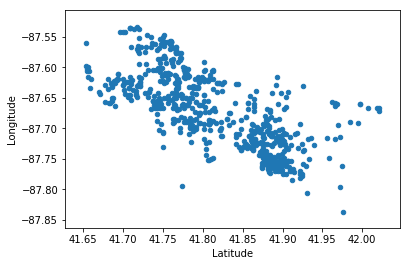

In [3]:
from sklearn.cluster import KMeans
Location = homicide[['Latitude','Longitude']]
Location.plot.scatter(x='Latitude',y='Longitude')

Let's use K-Means to process the coordinates. And we'll use different K to test the effect of the clustering algorithm.
One of the metrics that is commonly used to compare results across different values of K is the mean distance between data points and their cluster centroid. Since increasing the number of clusters will always reduce the distance to data points, increasing K will always decrease this metric, to the extreme of reaching zero when K is the same as the number of data points. Thus, this metric cannot be used as the sole target. Instead, mean distance to the centroid as function of K is plotted and the “elbow point,” where the rate of decrease sharply shifts, can be used to roughly determine K[4]. 
This code is adpated from the one in [4] by Rajshekhar Bodhale.

Text(0,0.5,'Average Within-Cluster distance to Centroid (WCSS)')

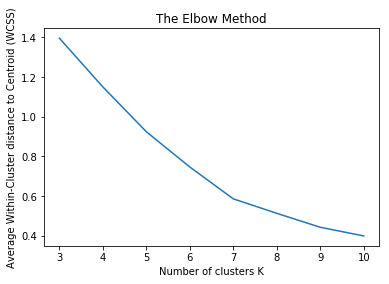

In [4]:
wcss=[]
for k in range(3,11):
    Res=KMeans(n_clusters=k,init='k-means++').fit(Location)    
    wcss.append(Res.inertia_)   
fig = plt.figure()    
plt.plot(range(3,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters K')
plt.ylabel('Average Within-Cluster distance to Centroid (WCSS)')

Using the elbow method we find the optimal number of clusters i.e. K=7.
Let us plot the graph for K=5,6,7,8 to see the effect of clustering

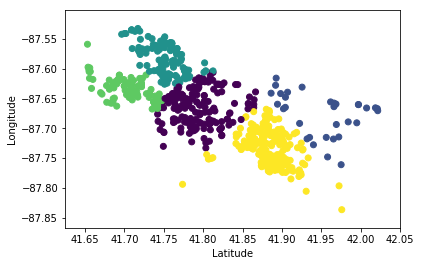

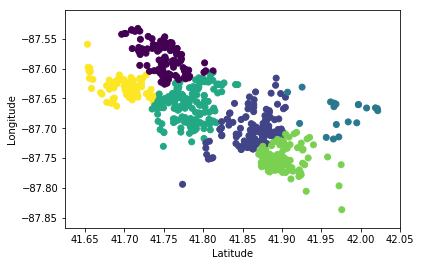

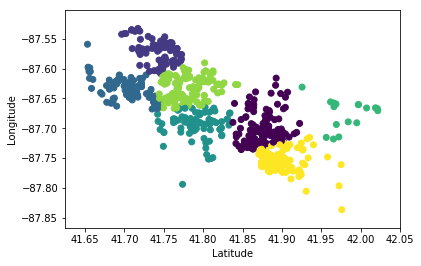

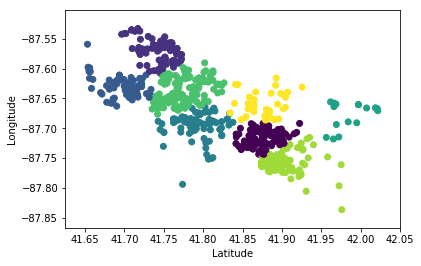

In [33]:
for k in range(5,9):
    Res=KMeans(n_clusters=k,init='k-means++').fit(Location)
    centers=Res.labels_ 
    fig = plt.figure()
    T=fig.add_subplot(111)
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    T.scatter(Location['Latitude'],Location['Longitude'],c=centers)        

From the graph above, we can see that use K=7 can group the data better in geographical coordinations.
Next, let's take another angle, and take into acount the income and the crime number in each Community area.

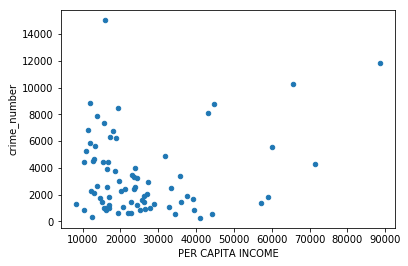

In [38]:
crime_count=crime['Community Area'].value_counts()
crime_count=crime_count.reset_index()  #to data frame
crime_count.columns=['Community Area','crime_number']  #rename
income=pd.read_csv('Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv',\
                   usecols=['Community Area Number','PER CAPITA INCOME '])
income=income[:-1]  #get rid of the last row
income.columns=['Community Area','PER CAPITA INCOME']
res=income.merge(crime_count,on='Community Area')
res.plot(x='PER CAPITA INCOME',y='crime_number',kind='scatter')

Text(0,0.5,u'Average Within-Cluster distance to Centroid (WCSS)')

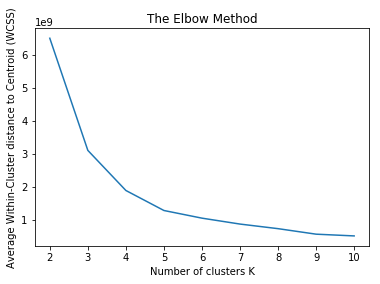

In [39]:
MH=res[['PER CAPITA INCOME','crime_number']]
wcss=[]
for k in range(2,11):
    Res=KMeans(n_clusters=k,init='k-means++').fit(MH)    
    wcss.append(Res.inertia_)   
fig = plt.figure()    
plt.plot(range(2,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters K')
plt.ylabel('Average Within-Cluster distance to Centroid (WCSS)')

From the graph we choose K=5, and now we run the K-means again to show the clustering

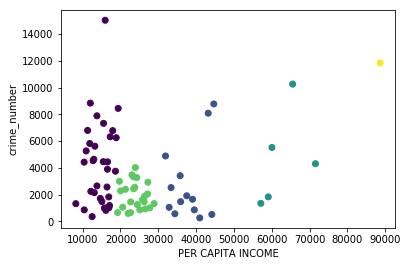

In [40]:
Res=KMeans(n_clusters=5,init='k-means++').fit(MH)
centers=Res.labels_ 
fig = plt.figure()
T=fig.add_subplot(111)
plt.xlabel('PER CAPITA INCOME')
plt.ylabel('crime_number')
T.scatter(MH['PER CAPITA INCOME'],MH['crime_number'],c=centers)        

From the graph ,we can see that, the class with income below 20000 is the worset, the crime numbers are higher than other classes in gernal, about 1/3 of the community areas fall into this class. And the green class with income between 20000 and 30000 is the best one, these community areas have lower crime numbers, and about another 1/3 of the areas fall into this class. And the intresting thing is that, the classes with income above 60000 have higher cirme number than the green one, though the number of areas in these two class is quite small.  

We have analize the crime number as a whole in each community area, but we know not every kind of crime is that serious. Let's take a closer look at the homicide.

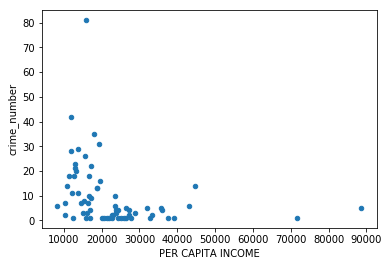

In [41]:
crime_count=homicide['Community Area'].value_counts()
crime_count=crime_count.reset_index()  #to data frame
crime_count.columns=['Community Area','crime_number']  #rename
income=pd.read_csv('Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv',\
                   usecols=['Community Area Number','PER CAPITA INCOME '])
income=income[:-1]  #get rid of the last row
income.columns=['Community Area','PER CAPITA INCOME']
res=income.merge(crime_count,on='Community Area')
res.plot(x='PER CAPITA INCOME',y='crime_number',kind='scatter')

Text(0,0.5,u'Average Within-Cluster distance to Centroid (WCSS)')

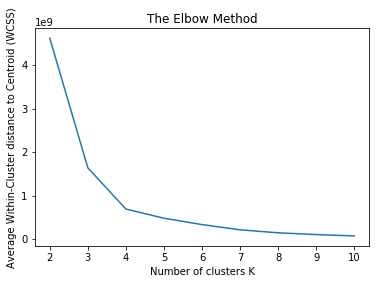

In [42]:
MH=res[['PER CAPITA INCOME','crime_number']]
wcss=[]
for k in range(2,11):
    Res=KMeans(n_clusters=k,init='k-means++').fit(MH)    
    wcss.append(Res.inertia_)   
fig = plt.figure()    
plt.plot(range(2,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters K')
plt.ylabel('Average Within-Cluster distance to Centroid (WCSS)')

From the graph we choose K=5, and now we run the K-means again to show the clustering

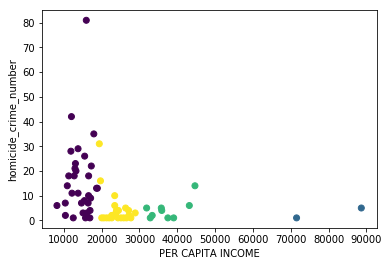

In [43]:
Res=KMeans(n_clusters=4,init='k-means++').fit(MH)
centers=Res.labels_ 
fig = plt.figure()
T=fig.add_subplot(111)
plt.xlabel('PER CAPITA INCOME')
plt.ylabel('homicide_crime_number')
T.scatter(MH['PER CAPITA INCOME'],MH['crime_number'],c=centers)        

From the graph we can see that the worse class is still the one with income below 20000, and the yellow class with income between 20000 and 30000 is the best in general, because the crime numbers in this class are low and about 2/3 of the areas outside the first class fall into this class. And we can also see that classes with income above 70000 contain almost no homicide crimes. These two classes are the safest area though the overall crime numbers in the areas are higher than the other classes with income above 20000. And we can conclude that poverty is one of the most important reason of serious crimes.  

# Bibliography
[1] https://scikit-learn.org/stable/modules/clustering.html

[2] https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2/data

[3] https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2 

[4] http://www.patterns7tech.com/customer-segmentation-using-machine-learning-k-means-clustering/

